In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda, Dropout, ELU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def build_model(og_img_shape):

    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape = og_img_shape))

    model.add(Conv2D(24, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(36, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(48, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation = 'elu'))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dense(10, activation = 'elu'))
    model.add(Dense(1))

    model.summary()

    return model

Using TensorFlow backend.


In [3]:
# model.save_weights('deepracer_weights.h5')

In [4]:
train = np.load('/Users/saurabh7/Downloads/data/0.npz', allow_pickle=True, encoding = 'latin1')['a'][:,0][:]
labels = np.load('/Users/saurabh7/Downloads/data/0.npz', allow_pickle=True, encoding = 'latin1')['a'][:,1][:]

In [5]:
labels.shape, train.shape

((54,), (54,))

In [6]:
for i in range(1, 9):
    a1 = np.load(
    '/Users/saurabh7/Downloads/data/{0}.npz'.format(i), allow_pickle=True, encoding = 'latin1')['a'][:,0][:]
    l1 = np.load(
    '/Users/saurabh7/Downloads/data/{0}.npz'.format(i), allow_pickle=True, encoding = 'latin1')['a'][:,1][:]    
    train = np.append(train, a1)
    labels = np.append(labels, l1)

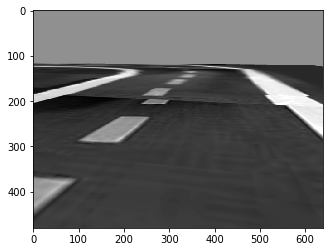

In [7]:
plt.imshow(train[0], cmap=plt.cm.gray)

In [22]:
train[0].shape

(480, 640)

In [ ]:
1, train[0].shape[0], train[0].shape[1]

In [8]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
# img = cv2.imread('racetrack.jpg')

In [ ]:
# plt.imshow(cv2.imread('racetrack.jpg'))

In [ ]:
np.array(xs).shape

In [9]:
xs = []

for x in train:
    xs.append(x)

xs = np.array(xs)

In [10]:
new_X = xs.reshape((xs.shape[0], xs.shape[1], xs.shape[2], 1))

In [11]:
new_X.shape

(621, 480, 640, 1)

In [12]:
model = build_model((new_X.shape[1], new_X.shape[2], 1))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 480, 640, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 24)      624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 24)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 36)        21636     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 40, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 20, 48)        43248     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 10, 48)        

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(new_X, labels, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(496, 480, 640, 1)

In [16]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.fit(X_train,y_train,validation_data=[X_test, y_test], epochs=3)

Train on 496 samples, validate on 125 samples
Epoch 1/3
496/496 [==============================] - 17s 34ms/step - loss: 0.4547 - val_loss: 0.0488
Epoch 2/3
496/496 [==============================] - 15s 31ms/step - loss: 0.0558 - val_loss: 0.0391
Epoch 3/3
496/496 [==============================] - 15s 30ms/step - loss: 0.0411 - val_loss: 0.0436


In [19]:
X_train[6,:,:,:].shape

(480, 640, 1)

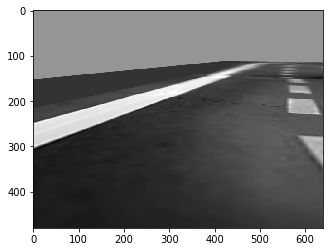

In [24]:
plt.imshow(X_train[6,:,:,0], cmap=plt.cm.gray)

In [25]:
print(y_train[6])

-0.1599999964237213


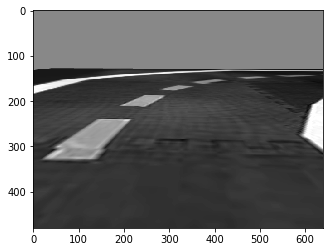

In [43]:
plt.imshow(X_test[10,:,:,0], cmap=plt.cm.gray)

In [44]:
model.predict(X_test[10,:,:,:].reshape((-1, 480, 640, 1)))

array([[0.02613773]], dtype=float32)

In [ ]:
model.save('deepracer_model.h5')

In [ ]:
# img.reshape(1, 342, 608, 3)